# Data quality checking and Assumptions

In [ ]:
import zipfile
import pandas as pd
import pandasql as psql

# path to your zip file
zip_path = "Analyst_case_study.csv.zip"

# open the zip file
with zipfile.ZipFile(zip_path, 'r') as z:
    # list all files inside the zip
    print(z.namelist())
    
    # pick the first CSV file (or specify the name if you know it)
    csv_filename = 'Analyst_case_study.csv'
    
    # open and read it directly into pandas
    with z.open(csv_filename) as f:
        data = pd.read_csv(f)

print(data.head())  # show first rows

['Analyst_case_study.csv', '__MACOSX/._Analyst_case_study.csv']
                                         borrower_id  \
0  129108573d472a140502088fa7bac107ba4f0065f36273...   
1  9144bc499fbf3bfece3d8e7be17c251db7ad8dcb5f817d...   
2  9144bc499fbf3bfece3d8e7be17c251db7ad8dcb5f817d...   
3  9144bc499fbf3bfece3d8e7be17c251db7ad8dcb5f817d...   
4  9144bc499fbf3bfece3d8e7be17c251db7ad8dcb5f817d...   

                                             loan_id loan_issued_at  country  \
0  ac32d5ae9235b45a06b862b626371efa4257a13ed172c8...     2025-06-12  Estonia   
1  b30a628805f31fc543a28c4b27e2db9db964520ec324d5...     2025-04-19  Estonia   
2  83b6f5511ba9235ad54c176d9768bcfc2125d435614581...     2025-04-23  Estonia   
3  ae73d66a03b0426f28712322f7a86b0b3b82e6a6bd8070...     2025-05-31  Estonia   
4  18d797cdcbf548155d0be637915466f0a31aca58891793...     2025-05-02  Estonia   

   outstanding_balance  repaid_amount_day  loan_duration  days_past_due  \
0              349.800                0.0  

In [ ]:
# Count of nulls in each column
data.isnull().sum()

borrower_id                 0
loan_id                     0
loan_issued_at              0
country                     0
outstanding_balance         2
repaid_amount_day           0
loan_duration               0
days_past_due          541795
report_date_local           0
dtype: int64

There are two columns with NA values, days_past_due makes sense to have null values because customer may pay loans in time, but I have two check 2 null values in outstanding balance. 

In [ ]:
data[data['outstanding_balance'].isnull()]

,borrower_id,loan_id,loan_issued_at,country,outstanding_balance,repaid_amount_day,loan_duration,days_past_due,report_date_local
456835,96de0a597381d17c654c36af1fcd02fd0c22abc6653239...,7ceabadffa1a9f2ecca8deae35c024498fa41943ef4761...,2025-05-14,Netherlands,NaN,0.0,54,NaN,2025-05-14
458498,db4556f8136b04e70b119d7906527a17f96295200fdd4c...,6eb7eba66cc925871b8c54f9493d2c98159d0398f5eab7...,2025-05-14,Netherlands,NaN,0.0,54,NaN,2025-05-14


In [ ]:
data[data['loan_id'] == '7ceabadffa1a9f2ecca8deae35c024498fa41943ef4761c9d4d0afb3d29ad9d0'].sort_values(by='report_date_local', ascending=True)

,borrower_id,loan_id,loan_issued_at,country,outstanding_balance,repaid_amount_day,loan_duration,days_past_due,report_date_local
456835,96de0a597381d17c654c36af1fcd02fd0c22abc6653239...,7ceabadffa1a9f2ecca8deae35c024498fa41943ef4761...,2025-05-14,Netherlands,NaN,0.000,54,NaN,2025-05-14
452286,96de0a597381d17c654c36af1fcd02fd0c22abc6653239...,7ceabadffa1a9f2ecca8deae35c024498fa41943ef4761...,2025-05-14,Netherlands,1047.046,0.000,54,0.0,2025-05-15
447615,96de0a597381d17c654c36af1fcd02fd0c22abc6653239...,7ceabadffa1a9f2ecca8deae35c024498fa41943ef4761...,2025-05-14,Netherlands,1071.378,0.000,54,45.0,2025-05-16
442820,96de0a597381d17c654c36af1fcd02fd0c22abc6653239...,7ceabadffa1a9f2ecca8deae35c024498fa41943ef4761...,2025-05-14,Netherlands,998.767,41.789,54,NaN,2025-05-17
437917,96de0a597381d17c654c36af1fcd02fd0c22abc6653239...,7ceabadffa1a9f2ecca8deae35c024498fa41943ef4761...,2025-05-14,Netherlands,998.767,0.000,54,NaN,2025-05-18
432907,96de0a597381d17c654c36af1fcd02fd0c22abc6653239...,7ceabadffa1a9f2ecca8deae35c024498fa41943ef4761...,2025-05-14,Netherlands,998.767,0.000,54,NaN,2025-05-19
427782,96de0a597381d17c654c36af1fcd02fd0c22abc6653239...,7ceabadffa1a9f2ecca8deae35c024498fa41943ef4761...,2025-05-14,Netherlands,998.767,0.000,54,NaN,2025-05-20
422545,96de0a597381d17c654c36af1fcd02fd0c22abc6653239...,7ceabadffa1a9f2ecca8deae35c024498fa41943ef4761...,2025-05-14,Netherlands,998.767,0.000,54,NaN,2025-05-21
417180,96de0a597381d17c654c36af1fcd02fd0c22abc6653239...,7ceabadffa1a9f2ecca8deae35c024498fa41943ef4761...,2025-05-14,Netherlands,998.767,0.000,54,NaN,2025-05-22
411676,96de0a597381d17c654c36af1fcd02fd0c22abc6653239...,7ceabadffa1a9f2ecca8deae35c024498fa41943ef4761...,2025-05-14,Netherlands,998.767,0.000,54,NaN,2025-05-23


In above result chunk, I see issued date and report date are same and first value is missing, however next days reporting values are full and following with 1047, 1071 etc. I think either we can copy second day values to replace with null or remove it, because it is first value.

In [ ]:
print(data.info())  # get a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555605 entries, 0 to 555604
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   borrower_id          555605 non-null  object 
 1   loan_id              555605 non-null  object 
 2   loan_issued_at       555605 non-null  object 
 3   country              555605 non-null  object 
 4   outstanding_balance  555603 non-null  float64
 5   repaid_amount_day    555605 non-null  float64
 6   loan_duration        555605 non-null  int64  
 7   days_past_due        13810 non-null   float64
 8   report_date_local    555605 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 38.2+ MB
None


In [ ]:
# Duplicate rows
print(f"Duplicate rows: {data.duplicated().sum()}")

Duplicate rows: 0


In [ ]:
data.describe()


,outstanding_balance,repaid_amount_day,loan_duration,days_past_due
count,555603.000000,555605.000000,555605.000000,13810.000000
mean,2079.749740,1.938116,67.746003,13.647719
std,2759.487969,49.114247,28.171332,15.087365
min,0.000000,0.000000,1.000000,0.000000
25%,344.982000,0.000000,48.000000,2.000000
50%,1029.600000,0.000000,78.000000,8.000000
75%,2409.891000,0.000000,84.000000,20.000000
max,17258.032000,10340.000000,124.000000,92.000000


We dont have any report_date_local before than loan_issued_at as expected

In [ ]:
invalid_dates = data[data['loan_issued_at'] > data['report_date_local']]
print(invalid_dates)
print(invalid_dates.shape)

Empty DataFrame
Columns: [borrower_id, loan_id, loan_issued_at, country, outstanding_balance, repaid_amount_day, loan_duration, days_past_due, report_date_local]
Index: []
(0, 9)


I also want to check whether there are any missing dates in consecutive days in report_date_local.

In [ ]:
import pandas as pd

# make sure the column is datetime
data['report_date_local'] = pd.to_datetime(data['report_date_local'], errors='coerce')

# sort by loan_id and date
data = data.sort_values(['loan_id', 'report_date_local'])

# compute day difference between consecutive reports per loan
data['date_diff'] = data.groupby('loan_id')['report_date_local'].diff().dt.days

# check for non-consecutive entries (anything other than 1 day gap)
gaps = data[(data['date_diff'].notna()) & (data['date_diff'] != 1)]

print("Loans with non-consecutive report dates:", gaps['loan_id'].nunique())
print(gaps[['loan_id', 'report_date_local', 'date_diff']].head(20))


Loans with non-consecutive report dates: 0
Empty DataFrame
Columns: [loan_id, report_date_local, date_diff]
Index: []


Only suspicious part is, outstanding_balance increase/decrease without pattern, for example, balance is 900 euros, and next day payment have been made 50 euro, and I expected 2 days later it will show as 850 euro, because it goes down from main loan, but somehow it shows 870, it is not for all loans, however there are some examples show up.

I assume that there are late fee/interest for loan, even though there are payment, interest still goes up days past. 

In [ ]:
data[data['loan_id'] == '9c948dbd9125daf9d9fdc8b9a370921f00449bfc3bddbdfd475b816dfc94e817']

,borrower_id,loan_id,loan_issued_at,country,outstanding_balance,repaid_amount_day,loan_duration,days_past_due,report_date_local,date_diff
322191,c268785edbf0e367e8d1db46d3f6bcbad30c39acd4a2f7...,9c948dbd9125daf9d9fdc8b9a370921f00449bfc3bddbd...,2025-06-05,Netherlands,343.200,0.0,24,NaN,2025-06-06,NaN
314547,c268785edbf0e367e8d1db46d3f6bcbad30c39acd4a2f7...,9c948dbd9125daf9d9fdc8b9a370921f00449bfc3bddbd...,2025-06-05,Netherlands,343.200,0.0,24,NaN,2025-06-07,1.0
306790,c268785edbf0e367e8d1db46d3f6bcbad30c39acd4a2f7...,9c948dbd9125daf9d9fdc8b9a370921f00449bfc3bddbd...,2025-06-05,Netherlands,343.200,0.0,24,NaN,2025-06-08,1.0
298945,c268785edbf0e367e8d1db46d3f6bcbad30c39acd4a2f7...,9c948dbd9125daf9d9fdc8b9a370921f00449bfc3bddbd...,2025-06-05,Netherlands,343.200,0.0,24,NaN,2025-06-09,1.0
290951,c268785edbf0e367e8d1db46d3f6bcbad30c39acd4a2f7...,9c948dbd9125daf9d9fdc8b9a370921f00449bfc3bddbd...,2025-06-05,Netherlands,343.200,0.0,24,NaN,2025-06-10,1.0
282788,c268785edbf0e367e8d1db46d3f6bcbad30c39acd4a2f7...,9c948dbd9125daf9d9fdc8b9a370921f00449bfc3bddbd...,2025-06-05,Netherlands,343.200,0.0,24,NaN,2025-06-11,1.0
274465,c268785edbf0e367e8d1db46d3f6bcbad30c39acd4a2f7...,9c948dbd9125daf9d9fdc8b9a370921f00449bfc3bddbd...,2025-06-05,Netherlands,343.200,0.0,24,NaN,2025-06-12,1.0
266027,c268785edbf0e367e8d1db46d3f6bcbad30c39acd4a2f7...,9c948dbd9125daf9d9fdc8b9a370921f00449bfc3bddbd...,2025-06-05,Netherlands,343.200,0.0,24,NaN,2025-06-13,1.0
257429,c268785edbf0e367e8d1db46d3f6bcbad30c39acd4a2f7...,9c948dbd9125daf9d9fdc8b9a370921f00449bfc3bddbd...,2025-06-05,Netherlands,343.200,0.0,24,NaN,2025-06-14,1.0
248670,c268785edbf0e367e8d1db46d3f6bcbad30c39acd4a2f7...,9c948dbd9125daf9d9fdc8b9a370921f00449bfc3bddbd...,2025-06-05,Netherlands,343.200,0.0,24,NaN,2025-06-15,1.0


I found one loan, which loan amount has been paid off on 2025-06-28, it shows 0 amount for next 2 days, however after that, it shows 1.782 euro for next 4 days with due date 4 for each reporting date, I think, this could be error or loan has not been closed.

In [ ]:
import zipfile
import pandas as pd
import pandasql as psql

# path to your zip file
zip_path = "Analyst_case_study.csv.zip"

# open the zip file
with zipfile.ZipFile(zip_path, 'r') as z:
    # list all files inside the zip
    print(z.namelist())
    
    # pick the first CSV file (or specify the name if you know it)
    csv_filename = 'Analyst_case_study.csv'
    
    # open and read it directly into pandas
    with z.open(csv_filename) as f:
        data = pd.read_csv(f)

print(data.head())  # show first rows

# Section 1: Loan product and customers

## 1. Long-Term High-Value Debtors

A) Write a SQL query to identify customers who have been behind schedule for more than 10 days and have an outstanding balance greater than 2000 EUR.

In addition to borrower ID and total outstanding amount include:
- A flag whether their last payment is more than 5% lower than their previous payment
- A flag whether their outstanding balance has increased over the last 3 months.


In [8]:
query = """

-- ==============================================
-- Query: Loan Portfolio Monitoring & Risk Flags
-- Purpose:
--   1. Identify currently active loans (overdue + high balance).
--   2. Compare balances with 3 months ago.
--   3. Track repayment trends (last two payments).
--   4. Flag payment drop or balance increase risk indicators.
-- ==============================================

WITH base AS (
    -- ==========================================
    -- Step 1: Clean and normalize raw loan data
    -- ==========================================
    SELECT
        TRIM(borrower_id) AS borrower_id,        -- ensure borrower_id has no leading/trailing spaces
        TRIM(loan_id) AS loan_id,                -- clean loan_id
        DATE(loan_issued_at) AS loan_start,      -- ensure proper date format
        DATE(report_date_local) AS report_date,  -- ensure proper date format

        -- normalize balances (no NULLs or negative values)
        CASE 
            WHEN outstanding_balance IS NULL OR outstanding_balance < 0 THEN 0 
            ELSE CAST(outstanding_balance AS REAL) 
        END AS normalized_balance,

        -- normalize repayments (no NULLs or negative values)
        CASE 
            WHEN repaid_amount_day IS NULL OR repaid_amount_day < 0 THEN 0 
            ELSE CAST(repaid_amount_day AS FLOAT) 
        END AS repayment,

        -- calculate days past due = difference between report date and loan issue date
        CASE 
            WHEN loan_issued_at IS NOT NULL AND report_date_local IS NOT NULL
            THEN CAST(JULIANDAY(report_date_local) - JULIANDAY(loan_issued_at) AS INT)
        END AS days_due
    FROM data
    WHERE borrower_id IS NOT NULL 
      AND TRIM(borrower_id) <> ''
      AND loan_id IS NOT NULL 
      AND TRIM(loan_id) <> ''
      AND report_date_local IS NOT NULL 
      AND report_date_local <> ''
      AND loan_issued_at IS NOT NULL 
      AND loan_issued_at <> ''
),

latest_snapshot AS (
    -- ==========================================
    -- Step 2: Identify the latest loan record per borrower
    -- ==========================================
    SELECT
        borrower_id,
        loan_id,
        normalized_balance AS balance,   -- use cleaned balance
        days_due,
        report_date,
        repayment,
        ROW_NUMBER() OVER (PARTITION BY borrower_id ORDER BY report_date DESC) AS rn
        -- rn = 1 means most recent report date for that borrower
    FROM base
),

active_loans AS (
    -- ==========================================
    -- Step 3: Filter to "active risky loans"
    --   Conditions:
    --     - latest snapshot (rn = 1)
    --     - overdue by more than 10 days
    --     - balance > 2000
    -- ==========================================
    SELECT *
    FROM latest_snapshot
    WHERE rn = 1
      AND days_due > 10
      AND balance > 2000
),

three_months_ago AS (
    -- ==========================================
    -- Step 4: Get baseline balance ~3 months ago
    --   - Take the minimum report_date within the last 3 months
    --   - This gives earliest available snapshot within the window
    -- ==========================================
    SELECT 
        t.borrower_id,
        b.report_date AS date_3m_ago,
        b.normalized_balance AS balance_3m_ago
    FROM base b
    INNER JOIN (
        SELECT borrower_id, MIN(report_date) AS min_date
        FROM base
        WHERE report_date >= DATE((SELECT MAX(report_date) FROM base), '-3 months')
        GROUP BY borrower_id
    ) t 
      ON b.borrower_id = t.borrower_id 
     AND b.report_date = t.min_date
),

recent_two_payments AS (
    -- ==========================================
    -- Step 5: Identify last two non-zero repayments per borrower
    --   - last_payment = most recent repayment
    --   - prev_payment = one before that
    -- ==========================================
    SELECT
        borrower_id,
        MAX(repayment) FILTER (WHERE rn = 1) AS last_payment,
        MAX(repayment) FILTER (WHERE rn = 2) AS prev_payment
    FROM (
        SELECT
            b.borrower_id,
            b.repayment,
            ROW_NUMBER() OVER (PARTITION BY b.borrower_id ORDER BY b.report_date DESC) AS rn
        FROM base b
        WHERE b.repayment > 0
    )
    WHERE rn <= 2
    GROUP BY borrower_id
)

-- ==========================================
-- Step 6: Final result set with monitoring flags
-- ==========================================
SELECT
    al.borrower_id,
    al.balance AS latest_balance,          -- latest outstanding balance
    tma.balance_3m_ago,                    -- balance ~3 months ago
    tma.date_3m_ago,                       -- date of that balance
    al.days_due,                           -- days since loan issuance
    al.report_date AS latest_report,       -- latest available report date
    
    rtp.last_payment,                      -- most recent repayment amount
    rtp.prev_payment,                      -- previous repayment amount
    
    -- repayment decrease percentage
    ROUND(
        CASE 
            WHEN rtp.prev_payment > 0 
            THEN ((rtp.prev_payment - rtp.last_payment) / rtp.prev_payment) * 100
            ELSE 0 
        END, 2
    ) AS percent_payment_drop,
    
    -- repayment decrease flag (last < 95% of previous)
    CASE 
        WHEN rtp.last_payment < rtp.prev_payment * 0.95 THEN 1 
        ELSE 0 
    END AS payment_drop_flag,
   
    -- balance increase flag (balance grew vs. 3 months ago)
    CASE
        WHEN al.balance IS NOT NULL 
         AND tma.balance_3m_ago IS NOT NULL 
         AND al.balance > tma.balance_3m_ago
        THEN 1
        ELSE 0
    END AS balance_increased_flag

FROM active_loans al
LEFT JOIN recent_two_payments rtp ON al.borrower_id = rtp.borrower_id
LEFT JOIN three_months_ago tma ON al.borrower_id = tma.borrower_id
ORDER BY al.balance DESC;


"""

result = pssql.sqldf(query, locals())

result

,borrower_id,latest_balance,balance_3m_ago,date_3m_ago,days_due,latest_report,last_payment,prev_payment,percent_payment_drop,payment_drop_flag,balance_increased_flag
0,9056a38aab430e1c4fbc52561fbbee2c504bbaece354bc...,17258.032,16491.2,2025-04-08,97,2025-07-08,18.997,270.963,92.99,1,1
1,a82c607404745ec3390d2752c5ebca90ecaa710fd9337d...,16724.686,16491.2,2025-05-20,49,2025-07-08,253.704,NaN,0.00,0,1
2,1699d0a46c20392629580385d20200003e949912790e8a...,16491.200,16491.2,2025-06-20,18,2025-07-08,NaN,NaN,0.00,0,0
3,66d4e6ecd0f1b57e82829302e12d6828284f378038e3c6...,16491.200,16491.2,2025-06-27,11,2025-07-08,NaN,NaN,0.00,0,0
4,8c67ac17c97d539648a0dc585db010fabf6f9f7510ccd6...,16491.200,16491.2,2025-06-20,18,2025-07-08,NaN,NaN,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2776,b80b49b066775e306d79a949c4667f08579f19c981b2a8...,2014.474,2104.3,2025-04-08,98,2025-07-08,119.570,88.825,-34.61,0,0
2777,c7c23f1313d60dadb4cac084a788e3f5a183291564db64...,2009.216,1987.7,2025-04-29,70,2025-07-08,88.132,29.139,-202.45,0,1
2778,4f52608484f49e222221657e86532c3a8430de5752679b...,2008.864,2059.2,2025-06-05,33,2025-07-08,64.570,NaN,0.00,0,0
2779,d6a3bdc4c7234102ed829359950ba71d8657c91c60636b...,2005.366,2059.2,2025-05-08,61,2025-07-08,45.089,37.169,-21.31,0,0


B) Write a SQL query to find the top 10 customers with the highest total outstanding debt across
all loans. Include:
- A breakdown of their total outstanding debt accumulation over the past 6 weeks.
- A column with the total change and % change in their outstanding balance week-over-week.

In [7]:
query = """

-- ==============================================
-- Query: Weekly Outstanding Balance Evolution
-- Purpose:
--   1. Find top 10 borrowers by latest outstanding balance.
--   2. Track their weekly end-of-week balances for last 6 weeks.
--   3. Compute week-over-week absolute and % changes.
-- ==============================================

WITH base AS (
    -- ==========================================
    -- Step 1: Clean and normalize raw loan data
    -- ==========================================
    SELECT
        TRIM(borrower_id) AS borrower_id,        -- ensure borrower_id has no leading/trailing spaces
        TRIM(loan_id) AS loan_id,                -- clean loan_id
        DATE(loan_issued_at) AS loan_start,      -- ensure proper date format
        DATE(report_date_local) AS report_date,  -- ensure proper date format

        -- normalize balances (no NULLs or negative values)
        CASE 
            WHEN outstanding_balance IS NULL OR outstanding_balance < 0 THEN 0 
            ELSE CAST(outstanding_balance AS REAL) 
        END AS normalized_balance,

        -- normalize repayments (no NULLs or negative values)
        CASE 
            WHEN repaid_amount_day IS NULL OR repaid_amount_day < 0 THEN 0 
            ELSE CAST(repaid_amount_day AS FLOAT) 
        END AS repayment,

        -- calculate days past due = difference between report date and loan issue date
        CASE 
            WHEN loan_issued_at IS NOT NULL AND report_date_local IS NOT NULL
            THEN CAST(JULIANDAY(report_date_local) - JULIANDAY(loan_issued_at) AS INT)
        END AS days_due
    FROM data
    WHERE borrower_id IS NOT NULL 
      AND TRIM(borrower_id) <> ''
      AND loan_id IS NOT NULL 
      AND TRIM(loan_id) <> ''
      AND report_date_local IS NOT NULL 
      AND report_date_local <> ''
      AND loan_issued_at IS NOT NULL 
      AND loan_issued_at <> ''
),

max_date AS (
    -- Step 2: Anchor date = latest available report date in dataset
    SELECT MAX(report_date) AS latest_date
    FROM base
),

latest_balances AS (
    -- Step 3: Get latest total outstanding balance per borrower
    SELECT 
        d.borrower_id,
        SUM(d.normalized_balance) AS total_outstanding
    FROM base d
    JOIN (
        SELECT 
            borrower_id,
            MAX(report_date) AS latest_date
        FROM base
        GROUP BY borrower_id
    ) latest_snapshot 
      ON d.borrower_id = latest_snapshot.borrower_id
     AND d.report_date = latest_snapshot.latest_date
    GROUP BY d.borrower_id
),

top10_borrowers AS (
    -- Step 4: Restrict analysis to top 10 borrowers
    --         by their latest total outstanding balance
    SELECT borrower_id
    FROM latest_balances
    ORDER BY total_outstanding DESC
    LIMIT 10
),

week_end_balance AS (
    -- Step 5: For each borrower + loan + week:
    --         find the latest report date within that week
    --         (acts as the weekly snapshot)
    SELECT 
        d.borrower_id,
        d.loan_id,
        strftime('%Y-%W', d.report_date) AS year_week,  -- ISO year-week identifier
        MAX(d.report_date) AS week_end_date
    FROM base d
    JOIN top10_borrowers t ON d.borrower_id = t.borrower_id
    WHERE CAST(strftime('%W', d.report_date) AS INTEGER) 
              >= CAST(strftime('%W', (SELECT latest_date FROM max_date)) AS INTEGER) - 6
      AND strftime('%Y', d.report_date) = strftime('%Y', (SELECT latest_date FROM max_date))
    GROUP BY d.borrower_id, d.loan_id, strftime('%Y-%W', d.report_date)
),

weekly_totals AS (
    -- Step 6: Aggregate loan-level balances into 
    --         borrower-level weekly totals
    SELECT 
        w.borrower_id,
        w.year_week,
        w.week_end_date,
        SUM(d.normalized_balance) AS total_outstanding
    FROM week_end_balance w
    JOIN base d
      ON w.borrower_id = d.borrower_id
     AND w.loan_id = d.loan_id
     AND w.week_end_date = d.report_date
    GROUP BY w.borrower_id, w.year_week, w.week_end_date
)

-- ==============================================
-- Step 7: Final output
--   - Total balance per borrower per week
--   - Absolute change vs. prior week
--   - % change vs. prior week
-- ==============================================
SELECT 
    wt.*,
    ROUND(
        wt.total_outstanding - LAG(wt.total_outstanding) OVER (
            PARTITION BY wt.borrower_id ORDER BY wt.week_end_date
        ), 2
    ) AS change_abs,
    CASE 
        WHEN LAG(wt.total_outstanding) OVER (
                 PARTITION BY wt.borrower_id ORDER BY wt.week_end_date
             ) > 0
        THEN ROUND(
            100.0 * (wt.total_outstanding - LAG(wt.total_outstanding) OVER (
                         PARTITION BY wt.borrower_id ORDER BY wt.week_end_date
                     )) 
            / LAG(wt.total_outstanding) OVER (
                         PARTITION BY wt.borrower_id ORDER BY wt.week_end_date
                     ), 
            2
        )
        ELSE NULL
    END AS change_pct
FROM weekly_totals wt
ORDER BY wt.borrower_id, wt.week_end_date;


"""

result = pssql.sqldf(query, locals())

result

,borrower_id,year_week,week_end_date,total_outstanding,change_abs,change_pct
0,134c48a544f99a0117da44b254f1a538d48197d3771893...,2025-21,2025-06-01,16839.504,NaN,NaN
1,134c48a544f99a0117da44b254f1a538d48197d3771893...,2025-22,2025-06-08,16839.504,0.00,0.00
2,134c48a544f99a0117da44b254f1a538d48197d3771893...,2025-23,2025-06-15,16748.127,-91.38,-0.54
3,134c48a544f99a0117da44b254f1a538d48197d3771893...,2025-24,2025-06-22,16748.127,0.00,0.00
4,134c48a544f99a0117da44b254f1a538d48197d3771893...,2025-25,2025-06-29,16748.127,0.00,0.00
5,134c48a544f99a0117da44b254f1a538d48197d3771893...,2025-26,2025-07-06,16748.127,0.00,0.00
6,134c48a544f99a0117da44b254f1a538d48197d3771893...,2025-27,2025-07-08,16748.127,0.00,0.00
7,1699d0a46c20392629580385d20200003e949912790e8a...,2025-24,2025-06-22,16491.200,NaN,NaN
8,1699d0a46c20392629580385d20200003e949912790e8a...,2025-25,2025-06-29,16491.200,0.00,0.00
9,1699d0a46c20392629580385d20200003e949912790e8a...,2025-26,2025-07-06,16491.200,0.00,0.00


## 2. Recovery Rates

A) Write a SQL query to calculate the total daily recovery rate (total payments / total
outstanding balance). Also include:
- A 3-week moving average of the recovery rate.

In [9]:
query = """

-- =====================================================
-- Query: Daily Recovery Rate with 3-Week Moving Average
-- Purpose:
--   1. Clean and normalize raw loan data (balances & repayments).
--   2. Aggregate daily total repayments and outstanding balances.
--   3. Compute daily recovery rate (%) per day.
--   4. Calculate 21-day moving average of recovery rate (~3 weeks).
-- =====================================================


WITH base AS (
    -- ==========================================
    -- Step 1: Clean and normalize raw loan data
    -- ==========================================
    SELECT
        TRIM(borrower_id) AS borrower_id,        -- ensure borrower_id has no leading/trailing spaces
        TRIM(loan_id) AS loan_id,                -- clean loan_id
        DATE(loan_issued_at) AS loan_start,      -- ensure proper date format
        DATE(report_date_local) AS report_date,  -- ensure proper date format

        -- normalize balances (no NULLs or negative values)
        CASE 
            WHEN outstanding_balance IS NULL OR outstanding_balance < 0 THEN 0 
            ELSE CAST(outstanding_balance AS REAL) 
        END AS normalized_balance,

        -- normalize repayments (no NULLs or negative values)
        CASE 
            WHEN repaid_amount_day IS NULL OR repaid_amount_day < 0 THEN 0 
            ELSE CAST(repaid_amount_day AS FLOAT) 
        END AS repayment,

        -- calculate days past due = difference between report date and loan issue date
        CASE 
            WHEN loan_issued_at IS NOT NULL AND report_date_local IS NOT NULL
            THEN CAST(JULIANDAY(report_date_local) - JULIANDAY(loan_issued_at) AS INT)
        END AS days_due
    FROM data
    WHERE borrower_id IS NOT NULL 
      AND TRIM(borrower_id) <> ''
      AND loan_id IS NOT NULL 
      AND TRIM(loan_id) <> ''
      AND report_date_local IS NOT NULL 
      AND report_date_local <> ''
      AND loan_issued_at IS NOT NULL 
      AND loan_issued_at <> ''
),


daily_totals AS (
    -- ==========================================
    -- Step 2: Aggregate daily totals
    --   - Sum repayments and balances per day
    -- ==========================================
    SELECT
        report_date,
        SUM(repayment) AS daily_repayments,
        SUM(normalized_balance) AS daily_balance
    FROM base
    GROUP BY report_date
),

recovery_rates AS (
    -- ==========================================
    -- Step 3: Compute daily recovery rate (%)
    --   - Formula: daily_recovery_rate = daily_repayments ÷ daily_balance * 100
    --   - If daily_balance = 0, recovery_rate = 0
    -- ==========================================
    SELECT
        report_date,
        daily_repayments,
        daily_balance,
        CASE 
            WHEN daily_balance > 0 THEN ROUND(daily_repayments * 100.0 / daily_balance, 4)
            ELSE 0
        END AS recovery_rate
    FROM daily_totals
)

-- ==========================================
-- Step 4: Final output
--   - Compute 21-day moving average of recovery rate (~3 weeks)
--   - Count the number of days in the moving average window
--   - Order output by report date
-- ==========================================
SELECT
    report_date,
    daily_repayments,
    daily_balance,
    recovery_rate,
    ROUND(
        AVG(recovery_rate) OVER (
            ORDER BY report_date
            ROWS BETWEEN 20 PRECEDING AND CURRENT ROW
        ), 4
    ) AS recovery_rate_3week_ma,
    COUNT(*) OVER (
        ORDER BY report_date
        ROWS BETWEEN 20 PRECEDING AND CURRENT ROW
    ) AS window_size
FROM recovery_rates
ORDER BY report_date;


"""

result = pssql.sqldf(query, locals())

result

,report_date,daily_repayments,daily_balance,recovery_rate,recovery_rate_3week_ma,window_size
0,2025-04-01,0.000,3.378661e+05,0.0000,0.0000,1
1,2025-04-02,9.592,7.810949e+05,0.0012,0.0006,2
2,2025-04-03,16.489,1.185651e+06,0.0014,0.0009,3
3,2025-04-04,2310.022,1.531729e+06,0.1508,0.0383,4
4,2025-04-05,7923.740,1.869286e+06,0.4239,0.1155,5
...,...,...,...,...,...,...
94,2025-07-04,15913.865,2.385715e+07,0.0667,0.0856,21
95,2025-07-05,1796.036,2.384642e+07,0.0075,0.0854,21
96,2025-07-06,567.688,2.384268e+07,0.0024,0.0853,21
97,2025-07-07,24371.094,2.383001e+07,0.1023,0.0859,21


B) Using SQL, calculate the daily recovery rate per borrower and loan to give us better insight
into payment behavior over time. Also include:
- A running total of payments and days past due per customer, daily level.
- A flag for days when the recovery rate got worse.

In [10]:
query = """

-- =====================================================
-- Query: Daily Recovery Rate per Borrower & Loan
-- Purpose:
--   1. Compute daily recovery rate per borrower and loan.
--   2. Track running totals of repayments and days past due.
--   3. Flag days when recovery rate worsens (vs previous day).
-- =====================================================

WITH cleaned AS (
    -- ==========================================
    -- Step 1: Clean and normalize raw loan data
    -- ==========================================
    SELECT
        TRIM(borrower_id) AS borrower_id,
        TRIM(loan_id) AS loan_id,
        DATE(report_date_local) AS report_date,
        
        -- normalize outstanding balance
        CASE 
            WHEN outstanding_balance IS NULL OR outstanding_balance < 0
                THEN 0.0
            ELSE CAST(outstanding_balance AS REAL)
        END AS balance,

        -- normalize repayment
        CASE
            WHEN repaid_amount_day IS NULL OR repaid_amount_day < 0
                THEN 0.0
            ELSE CAST(repaid_amount_day AS REAL)
        END AS repayment,

        -- calculate days past due
        CASE 
            WHEN loan_issued_at IS NOT NULL AND report_date_local IS NOT NULL
            THEN CAST(JULIANDAY(report_date_local) - JULIANDAY(loan_issued_at) AS INT)
        END AS days_due
    FROM data
    WHERE borrower_id IS NOT NULL
      AND TRIM(borrower_id) <> ''
      AND loan_id IS NOT NULL
      AND TRIM(loan_id) <> ''
      AND report_date_local IS NOT NULL
      AND loan_issued_at IS NOT NULL
      --AND loan_id = '0d2dbdcce8fb3573d436062ed57e49e9bc6f816863e9ccb60bdd40cde71ad178'

),

daily_rates AS (
    -- ==========================================
    -- Step 2: Compute recovery rate per borrower + loan + day
    -- ==========================================
    SELECT
        borrower_id,
        loan_id,
        report_date,
        repayment,
        balance,
        days_due,
        CASE
            WHEN balance > 0 THEN ROUND(repayment * 100.0 / balance, 4)
            ELSE 0
        END AS recovery_rate
    FROM cleaned
),

running_totals AS (
    -- ==========================================
    -- Step 3: Running totals per borrower over time
    --   - Cumulative repayments
    --   - Cumulative days past due
    -- ==========================================
    SELECT
        borrower_id,
        loan_id,
        report_date,
        repayment,
        balance,
        days_due,
        recovery_rate,

        SUM(repayment) OVER (
            PARTITION BY borrower_id 
            ORDER BY report_date ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
        ) AS cumulative_repayments,

        SUM(days_due) OVER (
            PARTITION BY borrower_id 
            ORDER BY report_date ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW
        ) AS cumulative_days_due
    FROM daily_rates
)

-- ==========================================
-- Step 4: Add recovery rate deterioration flag
--   - Flag = 1 if today's recovery rate < yesterday's recovery rate
-- ==========================================
SELECT
    borrower_id,
    loan_id,
    report_date,
    repayment,
    balance,
    days_due,
    recovery_rate,
    cumulative_repayments,
    cumulative_days_due,

    CASE
        WHEN recovery_rate < LAG(recovery_rate) OVER (
                 PARTITION BY borrower_id, loan_id ORDER BY report_date
             ) THEN 1
        ELSE 0
    END AS recovery_worsened_flag
FROM running_totals
ORDER BY borrower_id, loan_id, report_date;


"""

result = pssql.sqldf(query, locals())

result

,borrower_id,loan_id,report_date,repayment,balance,days_due,recovery_rate,cumulative_repayments,cumulative_days_due,recovery_worsened_flag
0,00006f0463eb81e53ec28e0a1bd7e34b5a37b37a2eddd8...,b831f487e76f4acde072e1185ed88ec398a048907d9271...,2025-06-05,0.0,915.200,0,0.0,0.000,0,0
1,00006f0463eb81e53ec28e0a1bd7e34b5a37b37a2eddd8...,b831f487e76f4acde072e1185ed88ec398a048907d9271...,2025-06-06,0.0,915.200,1,0.0,0.000,1,0
2,00006f0463eb81e53ec28e0a1bd7e34b5a37b37a2eddd8...,b831f487e76f4acde072e1185ed88ec398a048907d9271...,2025-06-07,0.0,915.200,2,0.0,0.000,3,0
3,00006f0463eb81e53ec28e0a1bd7e34b5a37b37a2eddd8...,b831f487e76f4acde072e1185ed88ec398a048907d9271...,2025-06-08,0.0,915.200,3,0.0,0.000,6,0
4,00006f0463eb81e53ec28e0a1bd7e34b5a37b37a2eddd8...,b831f487e76f4acde072e1185ed88ec398a048907d9271...,2025-06-09,0.0,915.200,4,0.0,0.000,10,0
...,...,...,...,...,...,...,...,...,...,...
555600,ffef781115755ff2b17c41e8840cbcd4b361389573ac40...,52560c7b9a2151a7272766683224bf46c6e03859b0d657...,2025-07-04,0.0,340.384,27,0.0,4.851,378,0
555601,ffef781115755ff2b17c41e8840cbcd4b361389573ac40...,52560c7b9a2151a7272766683224bf46c6e03859b0d657...,2025-07-05,0.0,340.384,28,0.0,4.851,406,0
555602,ffef781115755ff2b17c41e8840cbcd4b361389573ac40...,52560c7b9a2151a7272766683224bf46c6e03859b0d657...,2025-07-06,0.0,340.384,29,0.0,4.851,435,0
555603,ffef781115755ff2b17c41e8840cbcd4b361389573ac40...,52560c7b9a2151a7272766683224bf46c6e03859b0d657...,2025-07-07,0.0,340.384,30,0.0,4.851,465,0


# Section 2: Data Analysis and processing

### A) Create a forecasting model for daily total repayments. Which technique(s) are you using and how did you choose them? Assume the forecasting range should be 7 days into the future.


I used Prophet and Holt-Winters because the data has daily repayment values with clear trend and weekly seasonality, but also contains many spikes and irregular fluctuations. Prophet is robust to these spikes, handles missing or irregular data, and can decompose trend and weekly seasonality, making it suitable for capturing the overall pattern. Holt-Winters is simple and interpretable, effectively models additive trend and seasonality, and provides a reliable benchmark for short-term forecasting. Together, they allow to model both the general trend and recurring patterns while being resilient to outliers and volatility in the data

12:03:10 - cmdstanpy - INFO - Chain [1] start processing
12:03:11 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Murad Khalilov\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Prophet Performance:
MAE: 18549.40
Median AE: 8231.04
RMSE: 36734.19
SMAPE: 74.57%

Holt-Winters Performance:
MAE: 18519.71
Median AE: 7105.32
RMSE: 36960.55
SMAPE: 73.37%

Prophet 7-Day Forecast with 95% CI:
                Forecast      Lower CI      Upper CI
2025-07-09  17388.551802  -1380.119838  37198.128565
2025-07-10  19833.917750   1238.966082  38962.562082
2025-07-11  20421.965853     29.474682  38817.443609
2025-07-12  13058.741454  -7470.944880  31801.624442
2025-07-13  12258.842686  -7599.512090  33092.650643
2025-07-14  31600.292138  10833.816597  50223.169852
2025-07-15  21412.770156   1855.131789  40173.778617

Holt-Winters 7-Day Forecast:
2025-07-09    15205.982294
2025-07-10    16352.454151
2025-07-11    18746.056670
2025-07-12     8429.153260
2025-07-13     8552.386668
2025-07-14    29512.919107
2025-07-15    18090.157537
Freq: D, dtype: float64


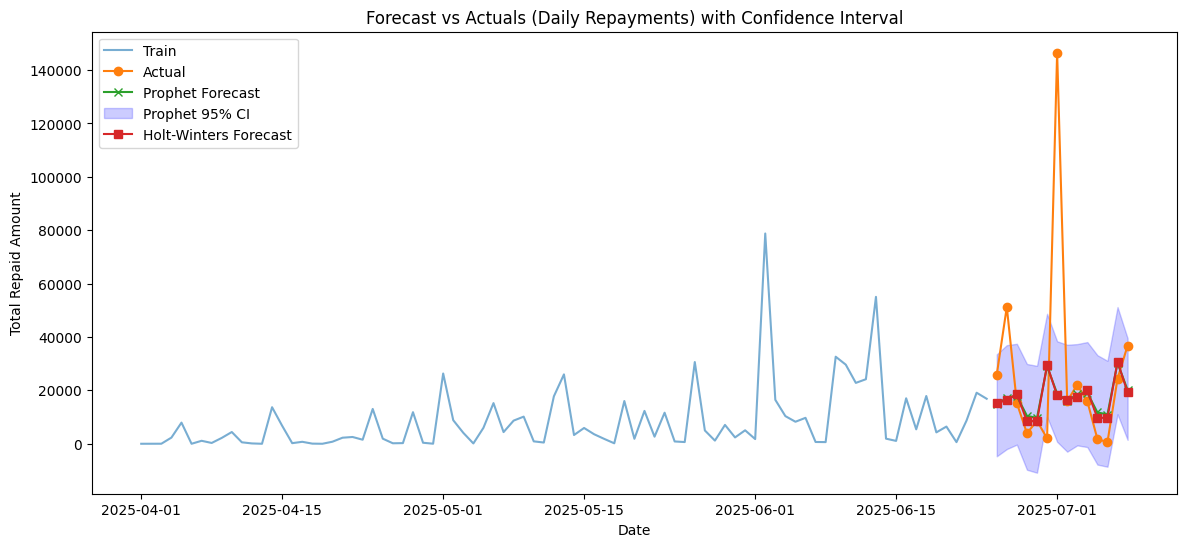

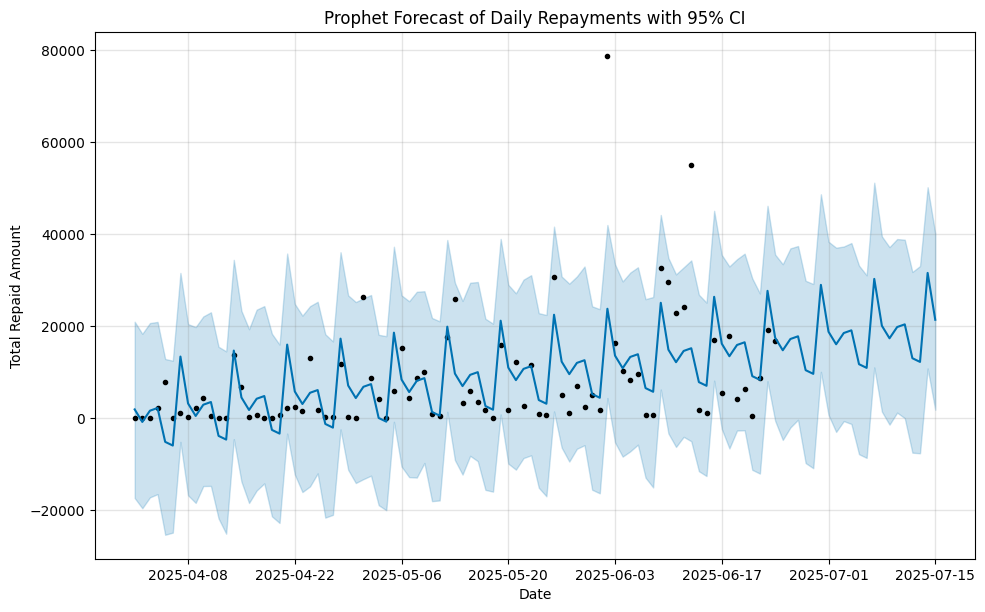

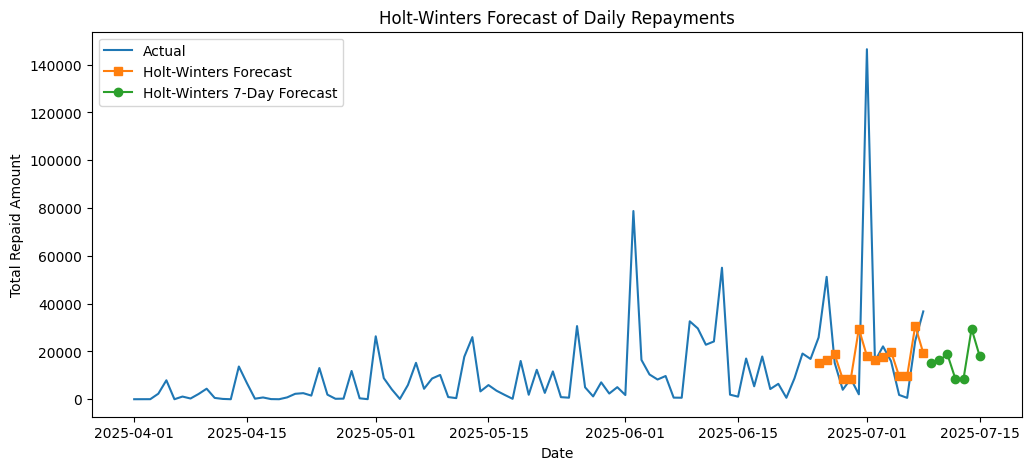

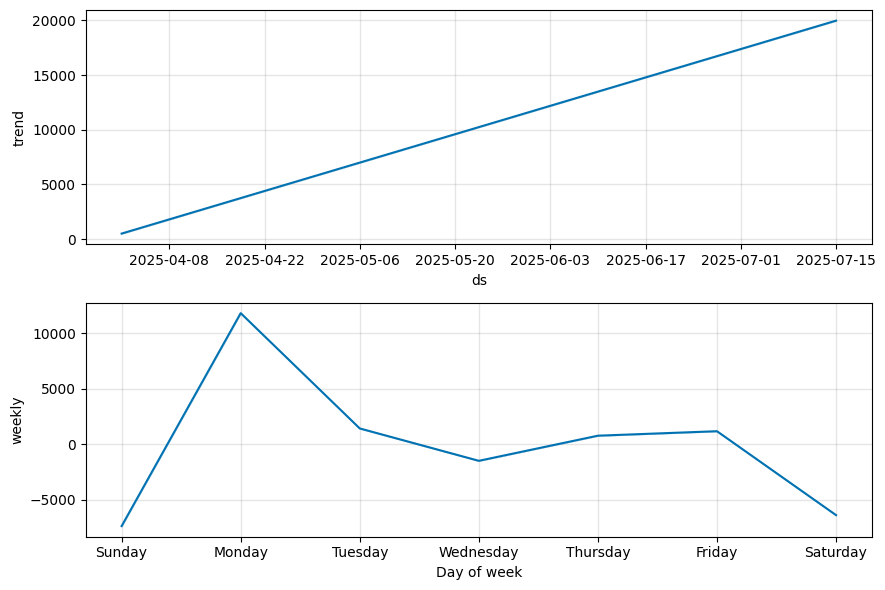

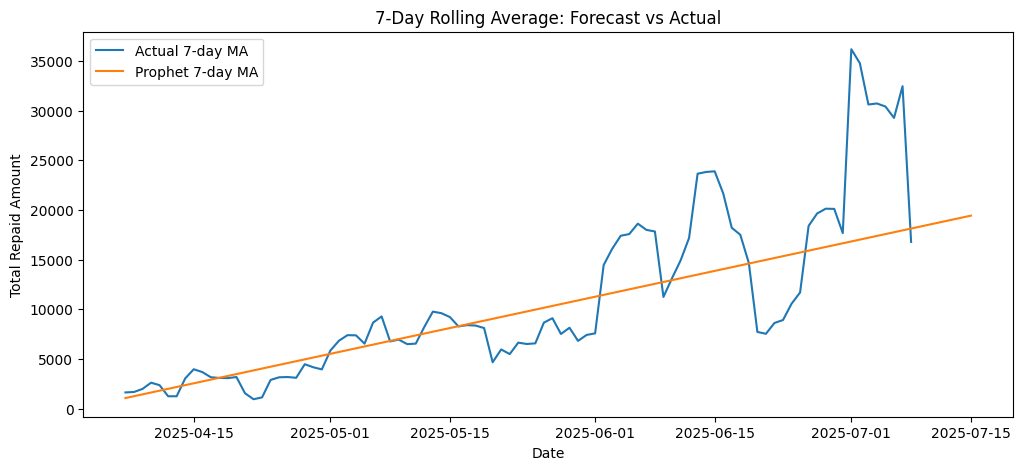

In [ ]:
# -----------------------------
# Aligned Forecast Pipeline: Prophet + Holt-Winters (With CI & Stats)
# -----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# -----------------------------
# 1. Load and aggregate data
# -----------------------------
df = data.copy()  # your original dataset

# 1. Ensure datetime type
df['report_date_local'] = pd.to_datetime(df['report_date_local'], errors='coerce')
df['loan_issued_at'] = pd.to_datetime(df['loan_issued_at'], errors='coerce')

# 2. Drop rows with missing dates
df = df.dropna(subset=['report_date_local', 'loan_issued_at'])

daily_repayments = df.groupby(df['report_date_local'].dt.date)['repaid_amount_day'].sum().reset_index()
daily_repayments.columns = ['ds','y']
daily_repayments['ds'] = pd.to_datetime(daily_repayments['ds'])
daily_repayments.set_index('ds', inplace=True)

# -----------------------------
# 2. Split train/test
# -----------------------------
test_days = 14
train = daily_repayments.iloc[:-test_days]
test = daily_repayments.iloc[-test_days:]

# -----------------------------
# 3. Define robust metrics
# -----------------------------
def medae(y_true, y_pred):
    return np.median(np.abs(y_true - y_pred))

def smape(y_true, y_pred):
    return 100 * np.mean(np.abs(y_pred - y_true) / ((np.abs(y_true) + np.abs(y_pred)) / 2))

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# -----------------------------
# 4. Prophet Forecast
# -----------------------------
prophet_model = Prophet(weekly_seasonality=True, daily_seasonality=False, interval_width=0.95)  # 95% CI
prophet_model.fit(train.reset_index())

# Forecast including test + next 7 days
future = prophet_model.make_future_dataframe(periods=test_days + 7)
forecast_prophet = prophet_model.predict(future)

# Extract test predictions
pred_prophet_test = forecast_prophet.set_index('ds').loc[test.index]['yhat']
pred_prophet_lower = forecast_prophet.set_index('ds').loc[test.index]['yhat_lower']
pred_prophet_upper = forecast_prophet.set_index('ds').loc[test.index]['yhat_upper']

# Evaluate Prophet
prophet_mae = mean_absolute_error(test['y'], pred_prophet_test)
prophet_medae = medae(test['y'], pred_prophet_test)
prophet_rmse = rmse(test['y'], pred_prophet_test)
prophet_smape = smape(test['y'], pred_prophet_test)

print("Prophet Performance:")
print(f"MAE: {prophet_mae:.2f}")
print(f"Median AE: {prophet_medae:.2f}")
print(f"RMSE: {prophet_rmse:.2f}")
print(f"SMAPE: {prophet_smape:.2f}%")

# -----------------------------
# 5. Holt-Winters Forecast
# -----------------------------
hw_model = ExponentialSmoothing(
    train['y'],
    trend='add',
    seasonal='add',
    seasonal_periods=7
).fit(optimized=True)

# Forecast test period
pred_hw_test = hw_model.forecast(steps=test_days)
pred_hw_test.index = test.index  # align index with test set

# Evaluate Holt-Winters
hw_mae = mean_absolute_error(test['y'], pred_hw_test)
hw_medae = medae(test['y'], pred_hw_test)
hw_rmse = rmse(test['y'], pred_hw_test)
hw_smape = smape(test['y'], pred_hw_test)

print("\nHolt-Winters Performance:")
print(f"MAE: {hw_mae:.2f}")
print(f"Median AE: {hw_medae:.2f}")
print(f"RMSE: {hw_rmse:.2f}")
print(f"SMAPE: {hw_smape:.2f}%")

# -----------------------------
# 6. Forecast Next 7 Days (Aligned)
# -----------------------------
future_dates = pd.date_range(start=test.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')

forecast_prophet_7 = forecast_prophet.set_index('ds').loc[future_dates]['yhat']
forecast_prophet_7_lower = forecast_prophet.set_index('ds').loc[future_dates]['yhat_lower']
forecast_prophet_7_upper = forecast_prophet.set_index('ds').loc[future_dates]['yhat_upper']

forecast_hw_7 = hw_model.forecast(steps=7)
forecast_hw_7.index = future_dates

print("\nProphet 7-Day Forecast with 95% CI:")
print(pd.DataFrame({
    'Forecast': forecast_prophet_7,
    'Lower CI': forecast_prophet_7_lower,
    'Upper CI': forecast_prophet_7_upper
}))

print("\nHolt-Winters 7-Day Forecast:")
print(forecast_hw_7)

# -----------------------------
# 7. Visualize Train, Test, Forecasts with CI
# -----------------------------
plt.figure(figsize=(14,6))
plt.plot(train.index, train['y'], label='Train', alpha=0.6)
plt.plot(test.index, test['y'], label='Actual', marker='o')
plt.plot(test.index, pred_prophet_test, label='Prophet Forecast', marker='x')
plt.fill_between(test.index, pred_prophet_lower, pred_prophet_upper, color='blue', alpha=0.2, label='Prophet 95% CI')
plt.plot(test.index, pred_hw_test, label='Holt-Winters Forecast', marker='s')
plt.title('Forecast vs Actuals (Daily Repayments) with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Total Repaid Amount')
plt.legend()
plt.show()

# -----------------------------
# 8. Full Prophet Forecast Plot with CI
# -----------------------------
fig1 = prophet_model.plot(forecast_prophet)
plt.title('Prophet Forecast of Daily Repayments with 95% CI')
plt.xlabel('Date')
plt.ylabel('Total Repaid Amount')
plt.show()

# -----------------------------
# 9. Holt-Winters Forecast Plot (simple matplotlib)
# -----------------------------
plt.figure(figsize=(12,5))
plt.plot(daily_repayments.index, daily_repayments['y'], label='Actual')
plt.plot(pred_hw_test.index, pred_hw_test, label='Holt-Winters Forecast', marker='s')
plt.plot(future_dates, forecast_hw_7, label='Holt-Winters 7-Day Forecast', marker='o')
plt.title('Holt-Winters Forecast of Daily Repayments')
plt.xlabel('Date')
plt.ylabel('Total Repaid Amount')
plt.legend()
plt.show()

# -----------------------------
# 10. Prophet Components (trend + weekly seasonality)
# -----------------------------
fig2 = prophet_model.plot_components(forecast_prophet)
plt.show()

# -----------------------------
# 11. Rolling Average to show general trend
# -----------------------------
daily_repayments['y_roll'] = daily_repayments['y'].rolling(7).mean()
forecast_prophet['yhat_roll'] = forecast_prophet['yhat'].rolling(7).mean()
forecast_prophet.set_index('ds', inplace=True)

plt.figure(figsize=(12,5))
plt.plot(daily_repayments.index, daily_repayments['y_roll'], label='Actual 7-day MA')
plt.plot(forecast_prophet.index, forecast_prophet['yhat_roll'], label='Prophet 7-day MA')
plt.title('7-Day Rolling Average: Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Total Repaid Amount')
plt.legend()
plt.show()


I built forecasting models to understand repayment dynamics by aggregating daily repayment amounts and splitting the data into training and test sets (last 14 days). Two models were applied: Prophet and Holt-Winters (Exponential Smoothing). Their performance was evaluated using robust metrics—Median Absolute Error (MedAE), which reflects typical error without being distorted by spikes, and SMAPE, which measures relative forecasting accuracy. Both models were also used to generate 7-day forecasts beyond the test period.

These models were chosen because the data shows weekly seasonality and contains spikes and volatility. Prophet is robust to irregularities, handles seasonality well, and provides interpretable trend components. Holt-Winters offers a simpler, classical approach that captures additive trend and seasonality effectively, making it a useful benchmark.

The results showed that both models performed similarly. The Median AE was around 7k–8k, meaning forecasts were reasonably accurate on a typical day, and SMAPE was around 73–75%, showing they captured relative accuracy despite volatility. Both models successfully reflected the general repayment trend and weekly cycles, although they could not predict extreme spikes.

The main challenge was the presence of large outliers, which inflated traditional error measures like MAE and RMSE. Using robust metrics helped reveal that the models actually performed well in capturing the overall repayment patterns. The key insight is that these forecasts are best used for trend and seasonal guidance, not for exact daily repayment predictions.

### B) Split the dataset in half for future A/B testing – each half should have a similar amount of borrowers, loans, loans per country, outstanding debt, ... i.e. make them as equal as possible.

Step 1. Load and prepare the data

- Reads the dataset into a pandas DataFrame.

- Fills missing outstanding_balance values with 0 so calculations work.

- Shuffles the dataset randomly (to avoid bias from ordering).


Step 2. Initialize variables

- group_A and group_B: lists that will hold the rows (loans) for each split.

- debt_A and debt_B: running totals of outstanding debt for each group.
 
- borrowers_A and borrowers_B: sets of borrower IDs (to track unique borrowers in each group).


Step 3. Balanced splitting by country

Loops through each country separately → ensures each split has a similar country distribution.

Inside each country group:

Sorts loans by outstanding_balance (largest → smallest). Because I want to distribute the big loans evenly across the two groups.

Alternates assignment (toggle = True/False) so loans are evenly distributed between Group A and B.

- toggle = True is just a flag that switches between True and False.

- First loan → goes to Group A (because toggle is True).

- Second loan → goes to Group B (because toggle flips to False).

- Third loan → goes back to Group A, and so on.

- group_A.append(row) → saves the loan in Group A’s dataset.

- debt_A += row["outstanding_balance"] → adds this loan’s debt to Group A’s total.

- borrowers_A.add(row["borrower_id"]) → keeps track of unique borrowers in Group A.

Updates debt totals and borrower sets.

✅ Result: both groups get similar loans per country and debt distribution.

=== Balance Check ===
Loans A: 277,803 | Loans B: 277,802
Unique Borrowers A: 6,184 | Unique Borrowers B: 6,182
Debt A: 577,765,528.10 | Debt B: 577,749,666.57
Debt Difference (%): 0.00%

=== Country Distribution A ===
country
Estonia        0.501
Netherlands    0.499
Name: proportion, dtype: float64

=== Country Distribution B ===
country
Estonia        0.501
Netherlands    0.499
Name: proportion, dtype: float64

=== Statistical Comparison of Balances ===

Group A stats:
 count    277803.000000
mean       2079.767058
std        2759.548497
min           0.000000
25%         344.982000
50%        1029.600000
75%        2409.891000
max       17258.032000
Name: outstanding_balance, dtype: float64

Group B stats:
 count    277802.000000
mean       2079.717448
std        2759.428114
min           0.000000
25%         344.982000
50%        1029.600000
75%        2409.891000
max       17258.032000
Name: outstanding_balance, dtype: float64


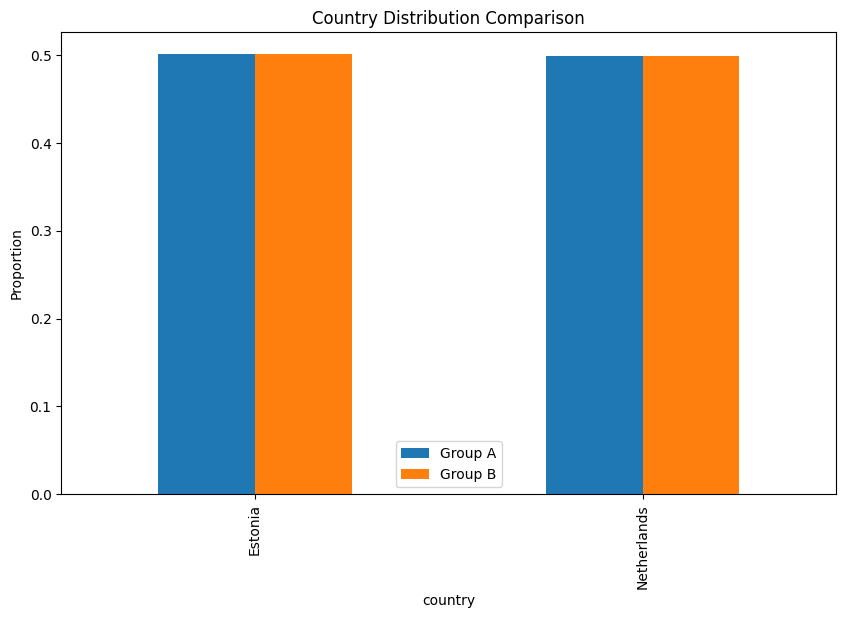

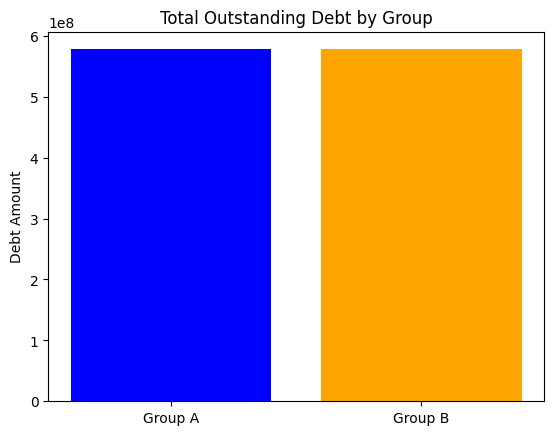

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# =====================================================
# Script: Fair Dataset Split into Group A & Group B
# Purpose:
#   1. Split loans into two balanced groups for experimentation (A/B testing).
#   2. Ensure fairness by alternating assignment within each country.
#   3. Verify balance using borrower counts, total debt, and distributions.
#   4. Visualize results & run statistical checks for fairness.
# =====================================================

# -----------------------------------------------------
# Step 1: Load dataset
# -----------------------------------------------------
df = data.copy()   # assume 'data' is a preloaded DataFrame

# Handle missing balances
df["outstanding_balance"] = df["outstanding_balance"].fillna(0)

# Shuffle dataset to randomize ordering
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# -----------------------------------------------------
# Step 2: Initialize groups
# -----------------------------------------------------
group_A, group_B = [], []
debt_A, debt_B = 0, 0
borrowers_A, borrowers_B = set(), set()

# -----------------------------------------------------
# Step 3: Split loans by country
# -----------------------------------------------------
for country, group in df.groupby("country"):
    # Sort within country by outstanding balance (largest first)
    group = group.sort_values("outstanding_balance", ascending=False)

    toggle = True
    for _, row in group.iterrows():
        if toggle:
            group_A.append(row)
            debt_A += row["outstanding_balance"]
            borrowers_A.add(row["borrower_id"])
        else:
            group_B.append(row)
            debt_B += row["outstanding_balance"]
            borrowers_B.add(row["borrower_id"])
        toggle = not toggle

# -----------------------------------------------------
# Step 4: Convert results into DataFrames
# -----------------------------------------------------
df_A = pd.DataFrame(group_A).reset_index(drop=True)
df_B = pd.DataFrame(group_B).reset_index(drop=True)

# -----------------------------------------------------
# Step 5: Diagnostics - Balance check
# -----------------------------------------------------
print("=== Balance Check ===")
print(f"Loans A: {len(df_A):,} | Loans B: {len(df_B):,}")
print(f"Unique Borrowers A: {len(borrowers_A):,} | Unique Borrowers B: {len(borrowers_B):,}")
print(f"Debt A: {debt_A:,.2f} | Debt B: {debt_B:,.2f}")
print(f"Debt Difference (%): {abs(debt_A-debt_B)/((debt_A+debt_B)/2)*100:.2f}%")

# Country-level distributions
print("\n=== Country Distribution A ===")
print(df_A["country"].value_counts(normalize=True).round(3))
print("\n=== Country Distribution B ===")
print(df_B["country"].value_counts(normalize=True).round(3))

# -----------------------------------------------------
# Step 6: Statistical comparison
# -----------------------------------------------------
print("\n=== Statistical Comparison of Balances ===")

desc_A = df_A["outstanding_balance"].describe()
desc_B = df_B["outstanding_balance"].describe()

print("\nGroup A stats:\n", desc_A)
print("\nGroup B stats:\n", desc_B)


# -----------------------------------------------------
# Step 7: Visualization
# -----------------------------------------------------

# Country distribution bar plot
country_counts = pd.DataFrame({
    "Group A": df_A["country"].value_counts(normalize=True),
    "Group B": df_B["country"].value_counts(normalize=True)
}).fillna(0)

country_counts.plot(kind="bar", figsize=(10,6))
plt.title("Country Distribution Comparison")
plt.ylabel("Proportion")
plt.show()

# Debt totals comparison
plt.bar(["Group A", "Group B"], [debt_A, debt_B], color=["blue","orange"])
plt.title("Total Outstanding Debt by Group")
plt.ylabel("Debt Amount")
plt.show()


The loan dataset was split into two experimental groups (Group A and Group B) for future testing, ensuring fairness across key metrics: borrower count, loan count, country, and outstanding debt.

1. Loan and Borrower Counts

Group A: 277,803 loans | Group B: 277,802 loans

Unique borrowers: 6,184 (A) | 6,182 (B)

Interpretation: Both groups have almost identical numbers of loans and borrowers. This ensures that experimental results are not biased by sample size differences.

2. Total Outstanding Debt

Group A: €577,765,528

Group B: €577,749,667

Debt difference: 0.00%

Interpretation: Both groups have virtually the same total exposure. This guarantees that any differences in repayment performance or loan behavior are due to the experiment, not underlying debt differences.

3. Country Distribution

Estonia: 50.1% in both groups

Netherlands: 49.9% in both groups

Interpretation: Both groups have identical geographic representation, ensuring fair testing across countries and preventing bias from country-specific behaviors.

4. Outstanding Balance Distribution

Median balance: ~€1,030 in both groups

75th percentile: ~€2,410

Maximum balance: ~€17,258

Interpretation: Both groups have similar distributions of loan sizes, ensuring fairness across low-, medium-, and high-risk borrowers.

This makes the two groups suitable for A/B testing or experimental interventions, ensuring that observed differences in outcomes can be confidently attributed to the experiment rather than data imbalances.

# Section 3: Business Insight and Interpretation

Based on your analysis, answer the following:
- Are high outstanding balances more likely to be in delay?
- Are short loan durations more likely to be on time?
- Which country should we focus on?

So firstly I tried to get rule-based check to understand risk level, besides rule-based, I also tested GMM modelling and K-means clustering and finally I additionally checked probability of default to which loans are more risky.

lets define firstly delayed days comes from report_date_local - loan_issed_at - loan duration, and if it is more than duration it means, it is delaying, and replacing all minus values with 0, because it has been delayed, in first section, we saw main focus point delay days more than 10 and more than 2000 euros, and we can create rules, and I took 36 days for short loans treshhold, 

Delay rate by high balance:
   high_balance  delay_risk  delay_percentage
0         False    0.119062         11.906182
1          True    0.052570          5.256985


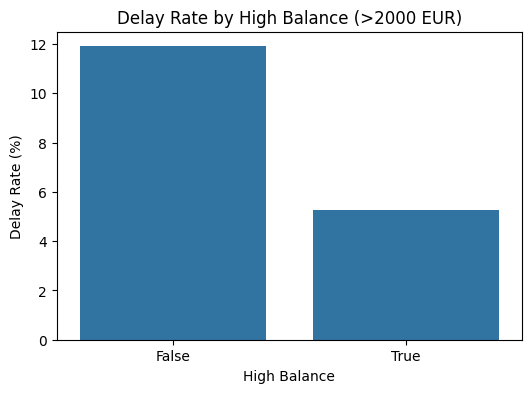


On-time rate by loan duration (short vs long):
   short_loan  delay_risk  on_time_percentage
0       False    0.027874           97.212608
1        True    0.365073           63.492660


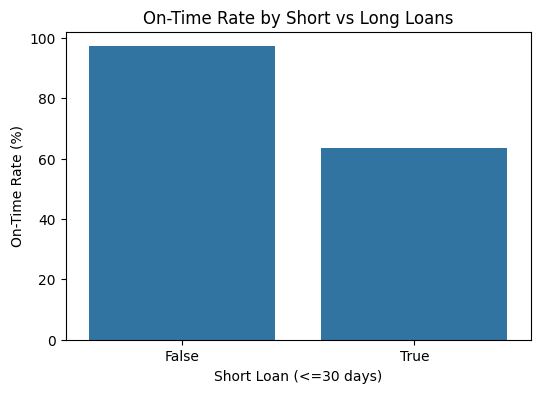


Country risk profile (sorted by delay rate and exposure):
       country  delay_risk  outstanding_balance  delay_percentage
0      Estonia    0.133408         5.145243e+08         13.340827
1  Netherlands    0.061077         6.409909e+08          6.107655


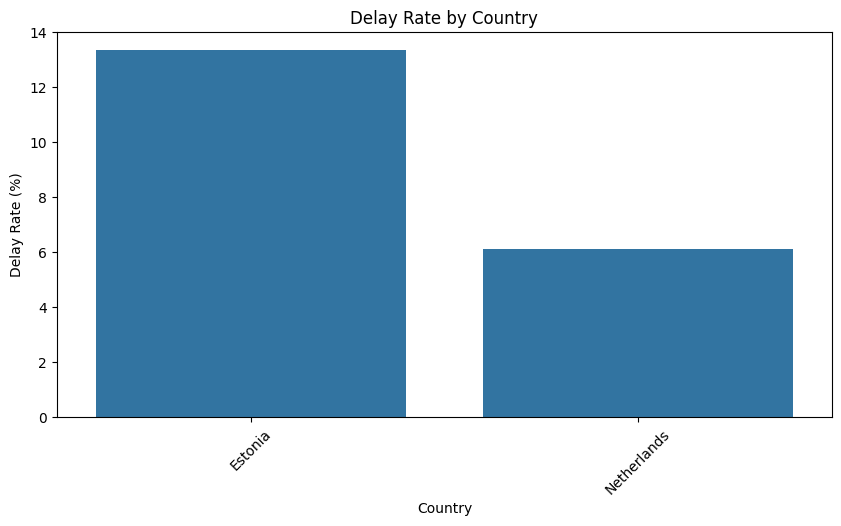


High-Risk Customers (High Balance & >10 days delay):
                                         borrower_id  outstanding_balance  \
0  00c1996279170b76d9dc0235afb155f3bd96863fd1236e...            77326.315   
1  00d85f20ac494ff83f28c20b7d194387ab7b098814f8db...            54078.651   
2  020d25cbc78e076548578260dac9b46c4eb4c5a9a3fe1a...             9047.401   
3  0271d1ffe6f7b1fc4fa0ecbcca5ccde57ec9316b31dc26...            40192.801   
4  02a25ea4580babdc5373080836cc25111401a10d3e8d07...            34220.560   
5  035026df681e1cb8172b0e07e25250d7ab114fc92d8f5b...            45077.560   
6  035c3fc4c64eda974c2a9ddd1393625dd7f8be0a8c991d...            41260.230   
7  036da9ac9f8f4c3ee067edc020261853adbb3ac70f2ae5...           186070.038   
8  03860fa91f44b81c8a9911178ebc4f7950e3dcbd071ae0...             9507.003   
9  03b49f2d2e48d9c7c27a3a47f8a13f5525532bc1c027d6...             8367.150   

   delayed_days  loan_duration      country  
0            47             48  Netherlands  
1     

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 0. Load dataset
# -----------------------------
df = data.copy()  # Replace with your dataset

# Ensure date columns are datetime
df['loan_issued_at'] = pd.to_datetime(df['loan_issued_at'])
df['report_date_local'] = pd.to_datetime(df['report_date_local'])

# -----------------------------
# 1. Compute actual delayed days
# -----------------------------
df['delayed_days'] = (df['report_date_local'] - df['loan_issued_at']).dt.days - df['loan_duration']
df['delayed_days'] = df['delayed_days'].apply(lambda x: max(x, 0))  # replace negative with 0

# Flag: loan delayed more than 10 days
df['delay_risk'] = df['delayed_days'] > 10

# -----------------------------
# 2. Rule-based flags
# -----------------------------
# High balance (>2000 EUR)
df['high_balance'] = df['outstanding_balance'] > 2000

# Short loan (<=36 days)
short_duration_threshold = 36
df['short_loan'] = df['loan_duration'] <= short_duration_threshold

# Risky loan: high balance AND delayed
df['risky_loan'] = df['delay_risk'] & df['high_balance']

# -----------------------------
# 3. Analysis: High balances → more likely delayed?
# -----------------------------
balance_delay = df.groupby('high_balance')['delay_risk'].mean().reset_index()
balance_delay['delay_percentage'] = balance_delay['delay_risk'] * 100
print("Delay rate by high balance:")
print(balance_delay)

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x='high_balance', y='delay_percentage', data=balance_delay)
plt.title("Delay Rate by High Balance (>2000 EUR)")
plt.xlabel("High Balance")
plt.ylabel("Delay Rate (%)")
plt.show()

# -----------------------------
# 4. Analysis: Short loans → more likely on time?
# -----------------------------
duration_delay = df.groupby('short_loan')['delay_risk'].mean().reset_index()
duration_delay['on_time_percentage'] = (1 - duration_delay['delay_risk']) * 100
print("\nOn-time rate by loan duration (short vs long):")
print(duration_delay)

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x='short_loan', y='on_time_percentage', data=duration_delay)
plt.title("On-Time Rate by Short vs Long Loans")
plt.xlabel("Short Loan (<=30 days)")
plt.ylabel("On-Time Rate (%)")
plt.show()

# -----------------------------
# 5. Analysis: Country-level risk
# -----------------------------
country_risk = df.groupby('country').agg({
    'delay_risk': 'mean',
    'outstanding_balance': 'sum'
}).reset_index()

country_risk['delay_percentage'] = country_risk['delay_risk'] * 100
country_risk = country_risk.sort_values(by=['delay_percentage', 'outstanding_balance'], ascending=False)
print("\nCountry risk profile (sorted by delay rate and exposure):")
print(country_risk)

# Visualization: Delay rate per country
plt.figure(figsize=(10, 5))
sns.barplot(x='country', y='delay_percentage', data=country_risk)
plt.title("Delay Rate by Country")
plt.xlabel("Country")
plt.ylabel("Delay Rate (%)")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# 6. Summary: Top risky customers
# -----------------------------
risky_customers = df[df['risky_loan']].copy()
summary_risky = risky_customers.groupby('borrower_id').agg({
    'outstanding_balance': 'sum',
    'delayed_days': 'max',
    'loan_duration': 'max',
    'country': lambda x: x.mode()[0]
}).reset_index()

print("\nHigh-Risk Customers (High Balance & >10 days delay):")
print(summary_risky.head(10))


Risk Analysis of Loan Delays: Rule-Based Insights

In order to understand the patterns of loan repayment delays, we conducted a rule-based analysis using actual delayed days calculated from the loan issue date, loan duration, and the report date. Any negative values of delayed days (i.e., loans not yet overdue) were replaced with zero to reflect that no delay had occurred. Using these calculated delays, we created several rules to identify potentially risky loans: loans with more than 10 days overdue, loans with outstanding balances greater than 2000 EUR, and short-term loans with duration thresholds set at 36 days for additional analysis.

1. Are high outstanding balances more likely to be in delay?

The analysis of delay rates based on outstanding balance yielded an interesting and somewhat counterintuitive finding. Loans with high balances greater than 2000 EUR had a delay rate of 5.26%, whereas loans with balances below this threshold had a delay rate of 11.91%.

This indicates that high-balance borrowers are not more likely to be delayed. In fact, they are less likely to miss payments. Several factors could contribute to this pattern: high-balance borrowers might be subject to stricter monitoring, better creditworthiness, or more careful financial planning. Therefore, contrary to a common assumption that large loans carry higher default risk, in this dataset, high outstanding balances appear to be more reliably repaid than lower balances.

2. Are short loan durations more likely to be on time?

When examining short versus long loan durations, the results show a striking difference in repayment behavior. Short-term loans (≤36 days) had an on-time repayment rate of only 63.5%, whereas longer-term loans had an on-time rate of 97.2%.

This reveals that short-duration loans are significantly more likely to be delayed, contradicting the intuitive expectation that shorter loans are easier to repay. Possible explanations include: borrowers under short-term financial pressure, insufficient time to accumulate funds for repayment, or higher frequency of these small, fast loans being taken by higher-risk borrowers. Consequently, in this dataset, loan duration is a key factor influencing repayment timeliness, with shorter loans showing a markedly higher risk of delay.

3. Which country should we focus on?

The country-level analysis shows that Estonia has the highest delay rate of 13.34%, compared to Netherlands at 6.11%, despite having slightly lower total outstanding exposure.

This suggests that Estonia should be the primary focus for risk mitigation efforts, as loans in this country are more likely to be delayed. By prioritizing monitoring, collections, or borrower support in Estonia, financial institutions can reduce the proportion of delayed loans more effectively than by focusing on countries with lower delay rates.

##  Gaussian Mixture Model (GMM) for clustering



GMM Cluster Profiles:
   cluster  avg_balance  median_balance  avg_duration  median_duration  \
0        0   581.987475         466.785     71.419398             84.0   
1        1   536.559156         451.495     28.297459             24.0   
2        2  3336.368967        2338.600     45.574575             36.0   
3        3  4726.200587        3432.000     77.415783             84.0   

   avg_delayed_days  median_delayed_days  delay_rate  loan_count  top_country  
0          0.000000                  0.0    0.000000      287095  Netherlands  
1         22.734569                 19.0    0.694374       59262      Estonia  
2         17.018628                 12.0    0.556077       23245      Estonia  
3          0.000000                  0.0    0.000000      186001  Netherlands  


c:\Users\Murad Khalilov\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


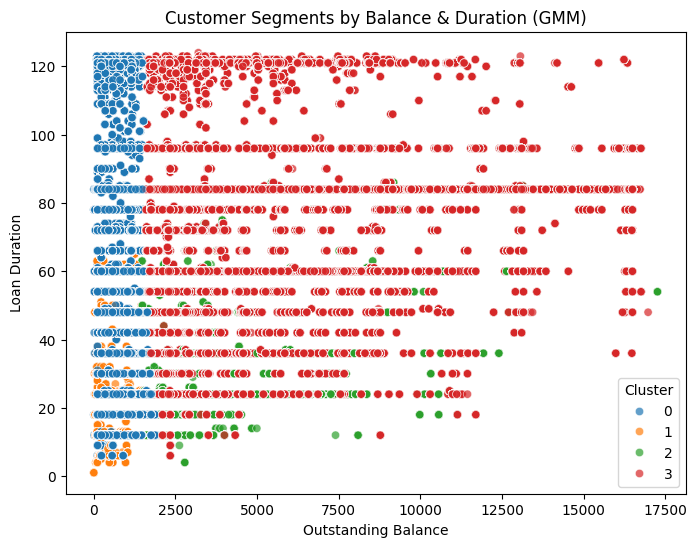

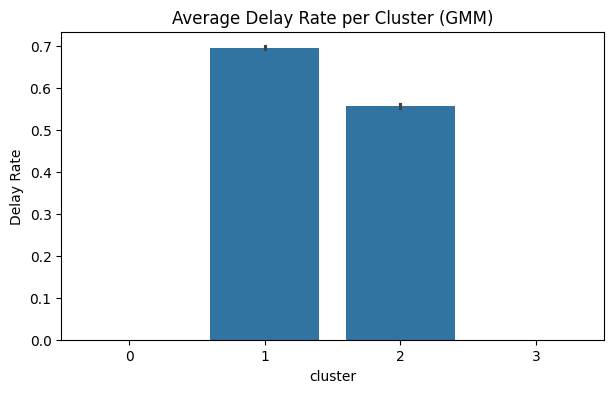


Most Risky Cluster(s) based on average delayed days:
   cluster  avg_balance  median_balance  avg_duration  median_duration  \
1        1   536.559156         451.495     28.297459             24.0   

   avg_delayed_days  median_delayed_days  delay_rate  loan_count top_country  
1         22.734569                 19.0    0.694374       59262     Estonia  


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 0. Prepare dataset
# -----------------------------
df = data.copy()  # Replace with your dataset

df['loan_issued_at'] = pd.to_datetime(df['loan_issued_at'])
df['report_date_local'] = pd.to_datetime(df['report_date_local'])

# -----------------------------
# 1. Compute delayed days
# -----------------------------
df['delayed_days'] = (df['report_date_local'] - df['loan_issued_at']).dt.days - df['loan_duration']
df['delayed_days'] = df['delayed_days'].apply(lambda x: max(x, 0))

# Optional rule-based flags
df['high_balance'] = df['outstanding_balance'] > 2000
short_duration_threshold = 40
df['short_loan'] = df['loan_duration'] <= short_duration_threshold
df['delay_risk'] = df['delayed_days'] > 10

# -----------------------------
# 2. Features for clustering
# -----------------------------
features = df[['outstanding_balance', 'loan_duration', 'delayed_days']].copy()
features_clean = features.replace([np.inf, -np.inf], np.nan).dropna()
df_clean = df.loc[features_clean.index]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_clean)

# -----------------------------
# 3. Run Gaussian Mixture Model
# -----------------------------
n_clusters = 4
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df_clean['cluster'] = gmm.fit_predict(X_scaled)

# Optional: probabilities of each cluster for each loan
proba = gmm.predict_proba(X_scaled)
df_clean[[f'cluster_prob_{i}' for i in range(n_clusters)]] = proba

# -----------------------------
# 4. Cluster profiling
# -----------------------------
cluster_profile = df_clean.groupby('cluster').agg({
    'outstanding_balance': ['mean', 'median'],
    'loan_duration': ['mean', 'median'],
    'delayed_days': ['mean', 'median'],
    'delay_risk': 'mean',
    'loan_id': 'count',
    'country': lambda x: x.mode()[0]
}).reset_index()

# Flatten columns
cluster_profile.columns = ['cluster', 'avg_balance', 'median_balance', 'avg_duration', 'median_duration',
                           'avg_delayed_days', 'median_delayed_days', 'delay_rate', 'loan_count', 'top_country']

print("\nGMM Cluster Profiles:")
print(cluster_profile)

# -----------------------------
# 5. Visualizations
# -----------------------------
# Scatter plot: Balance vs Duration, colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='outstanding_balance',
    y='loan_duration',
    hue='cluster',
    palette='tab10',
    data=df_clean,
    alpha=0.7
)
plt.title("Customer Segments by Balance & Duration (GMM)")
plt.xlabel("Outstanding Balance")
plt.ylabel("Loan Duration")
plt.legend(title="Cluster")
plt.show()

# Bar plot: Delay rate by cluster
plt.figure(figsize=(7, 4))
sns.barplot(x='cluster', y='delay_risk', data=df_clean, estimator=np.mean)
plt.title("Average Delay Rate per Cluster (GMM)")
plt.ylabel("Delay Rate")
plt.show()

# Highlight highest-risk cluster
high_risk_cluster = cluster_profile.sort_values(by='avg_delayed_days', ascending=False).head(1)
print("\nMost Risky Cluster(s) based on average delayed days:")
print(high_risk_cluster)


### Business Interpretation of GMM Clusters

#### Cluster 0
- **Avg balance:** €582 → low  
- **Avg delayed days:** 0 → loans are fully on time  
- **Delay rate:** 0% → very safe  
- **Top country:** Netherlands  
**Interpretation:** These are safe, low-value customers. Low risk, minimal monitoring needed.

#### Cluster 1
- **Avg balance:** €537 → low  
- **Avg delayed days:** 22.7 → significant delays  
- **Delay rate:** 69% → extremely high-risk  
- **Top country:** Estonia  
**Interpretation:** High-priority risk cluster. Although balances are small, nearly 7 out of 10 loans are delayed. Immediate monitoring or intervention needed.

#### Cluster 2
- **Avg balance:** €3,336 → medium-high  
- **Avg delayed days:** 17 → considerable delays  
- **Delay rate:** 56% → high-risk  
- **Top country:** Estonia  
**Interpretation:** Medium exposure but high risk. Monitor closely and consider stricter repayment policies.

#### Cluster 3
- **Avg balance:** €4,726 → high  
- **Avg delayed days:** 0 → loans are on time  
- **Delay rate:** 0% → very safe  
- **Top country:** Netherlands  
**Interpretation:** High-value customers who are reliable. Low risk, but since balances are large, still worth monitoring.

---

#### Key Takeaways
1. **Highest risk:** Cluster 1 (low balances, very high delays, Estonia) → immediate focus.  
2. **Medium risk:** Cluster 2 (medium balances, moderate-high delays, Estonia) → monitor closely.  
3. **Low risk:** Clusters 0 and 3 (Netherlands) → loans are on time; cluster 3 has high exposure but is safe.  

##### Business Action:
- **Focus monitoring and collection efforts** on Estonia-based customers in Clusters 1 and 2.  
- **High-value loans in Cluster 3** are safe but should still be tracked due to exposure size.  
- Use **cluster membership** to prioritize resource allocation for risk management.


## K-means clustering analysis

Cluster 0

Avg balance = 1,198 EUR → moderate.

Avg delay = 1.7 days → mostly on time.

Delay rate = 7.5% → low.

Country: Estonia.
Interpretation: Safe to moderate risk customers.

Cluster 1

Avg balance = 1,048 EUR → moderate.

Avg delay = 36 days, delay rate = 100%!
Interpretation: Extremely high-risk cluster. Even though balances aren’t huge, all loans are delayed. Highest priority.

Cluster 2

Avg balance = 1,270 EUR → moderate.

Avg delay = 0.1 days, delay rate = 0.27% → very safe.

Country: Netherlands.
Interpretation: Safe customers, low-risk loans.

Cluster 3

Avg balance = 8,332 EUR → very high balances.

Avg delay = 0.44 days, delay rate = 1.7% → low.

Country: Netherlands.
Interpretation: High exposure but loans mostly on time. Monitor them carefully — they’re “big borrowers, low risk so far.”

1. Are high outstanding balances more likely to be in delay?

High outstanding balances are not necessarily associated with delays. In fact, large loans appear to be repaid more reliably, while moderate loans can exhibit the highest risk.

2. Are short loan durations more likely to be on time?.

Short-duration loans are more likely to be delayed, whereas longer loans tend to be repaid on time.

3. Which country should we focus on?

Estonia should be the primary focus for monitoring and risk mitigation, as it contains the cluster of borrowers with the highest delayed days and delay rate.


Cluster Profiles:
   cluster  avg_balance  median_balance  avg_duration  median_duration  \
0        0  1198.332913         891.275     43.226609             48.0   
1        1  1048.253301         558.019     26.466837             24.0   
2        2  1270.105608         788.854     89.867464             84.0   
3        3  8332.237456        7602.100     78.397589             84.0   

   avg_delayed_days  median_delayed_days  delay_rate  loan_count  top_country  
0          1.721776                  0.0    0.075322      196144      Estonia  
1         36.057250                 33.0    1.000000       37467      Estonia  
2          0.098360                  0.0    0.002744      255124  Netherlands  
3          0.435590                  0.0    0.016974       66868  Netherlands  


c:\Users\Murad Khalilov\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


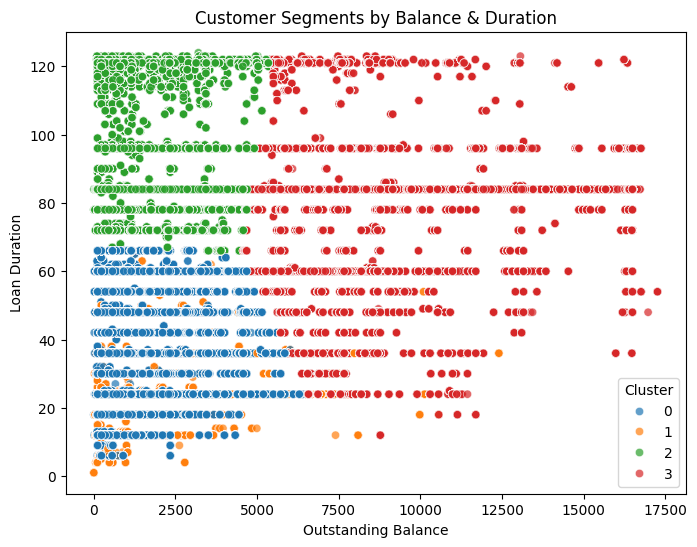

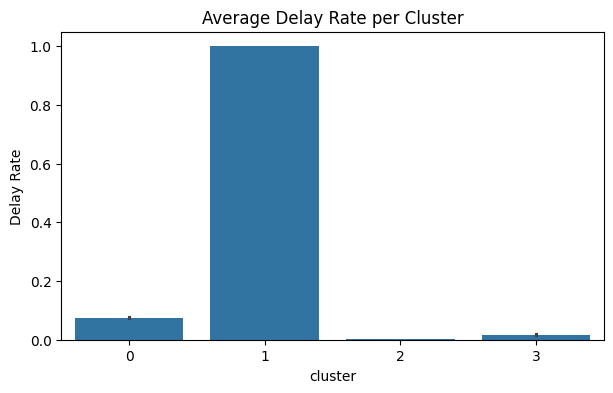


Most Risky Cluster(s) based on average delayed days:
   cluster  avg_balance  median_balance  avg_duration  median_duration  \
1        1  1048.253301         558.019     26.466837             24.0   

   avg_delayed_days  median_delayed_days  delay_rate  loan_count top_country  
1          36.05725                 33.0         1.0       37467     Estonia  


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 0. Load dataset
# -----------------------------
# df = pd.read_csv("loans.csv")  # Replace with your dataset

# Ensure date columns are datetime
df['loan_issued_at'] = pd.to_datetime(df['loan_issued_at'])
df['report_date_local'] = pd.to_datetime(df['report_date_local'])

# -----------------------------
# 1. Compute actual delayed days
# -----------------------------
df['delayed_days'] = (df['report_date_local'] - df['loan_issued_at']).dt.days - df['loan_duration']
df['delayed_days'] = df['delayed_days'].apply(lambda x: max(x, 0))

# -----------------------------
# 2. Optional: rule-based flags
# -----------------------------
df['high_balance'] = df['outstanding_balance'] > 2000
short_duration_threshold = 40
df['short_loan'] = df['loan_duration'] <= short_duration_threshold
df['delay_risk'] = df['delayed_days'] > 10

# -----------------------------
# 3. Features for clustering
# -----------------------------
features = df[['outstanding_balance', 'loan_duration', 'delayed_days']].copy()

# Drop rows with missing or infinite values
features_clean = features.replace([np.inf, -np.inf], np.nan).dropna()
df_clean = df.loc[features_clean.index]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_clean)

# -----------------------------
# 4. Run K-Means clustering
# -----------------------------
k = 4  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)

# -----------------------------
# 5. Cluster profiling
# -----------------------------
cluster_profile = df_clean.groupby('cluster').agg({
    'outstanding_balance': ['mean', 'median'],
    'loan_duration': ['mean', 'median'],
    'delayed_days': ['mean', 'median'],
    'delay_risk': 'mean',
    'loan_id': 'count',
    'country': lambda x: x.mode()[0]
}).reset_index()

# Flatten columns
cluster_profile.columns = ['cluster', 'avg_balance', 'median_balance', 'avg_duration', 'median_duration',
                           'avg_delayed_days', 'median_delayed_days', 'delay_rate', 'loan_count', 'top_country']

print("\nCluster Profiles:")
print(cluster_profile)

# -----------------------------
# 6. Visualizations
# -----------------------------
# Scatter plot: Balance vs Duration, colored by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='outstanding_balance',
    y='loan_duration',
    hue='cluster',
    palette='tab10',
    data=df_clean,
    alpha=0.7
)
plt.title("Customer Segments by Balance & Duration")
plt.xlabel("Outstanding Balance")
plt.ylabel("Loan Duration")
plt.legend(title="Cluster")
plt.show()

# Bar plot: Delay rate by cluster
plt.figure(figsize=(7, 4))
sns.barplot(x='cluster', y='delay_risk', data=df_clean, estimator=np.mean)
plt.title("Average Delay Rate per Cluster")
plt.ylabel("Delay Rate")
plt.show()

# Optional: Highlight high-risk clusters
high_risk_clusters = cluster_profile.sort_values(by='avg_delayed_days', ascending=False).head(1)
print("\nMost Risky Cluster(s) based on average delayed days:")
print(high_risk_clusters)


## Probability of Defaults

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

# -----------------------
# 1. Calculate delayed_days
# -----------------------
df = data.copy()
df["loan_issued_at"] = pd.to_datetime(df["loan_issued_at"])
df["report_date_local"] = pd.to_datetime(df["report_date_local"])

df["delayed_days"] = (
    (df["report_date_local"] - df["loan_issued_at"]).dt.days - df["loan_duration"]
)
df["delayed_days"] = df["delayed_days"].apply(lambda x: max(x, 0))  # replace negatives with 0

# Define default: delay > 30 days
df["in_default"] = (df["delayed_days"] > 30).astype(int)

# -----------------------
# 2. Feature Engineering
# -----------------------
X = df[["outstanding_balance", "loan_duration", "country"]]
y = df["in_default"]

# Drop rows with missing values (NaNs)
X = X.dropna()
y = y.loc[X.index]

# One-hot encode country
X = pd.get_dummies(X, columns=["country"], drop_first=True)

# Standardize numeric features
scaler = StandardScaler()
X[["outstanding_balance", "loan_duration"]] = scaler.fit_transform(
    X[["outstanding_balance", "loan_duration"]]
)

# -----------------------
# 3. Apply SMOTE
# -----------------------
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:", y.value_counts(normalize=True))
print("After SMOTE:", pd.Series(y_resampled).value_counts(normalize=True))

# -----------------------
# 4. Train Logistic Regression
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# -----------------------
# 5. Evaluation
# -----------------------
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Coefficients
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
})
print("\nLogistic Regression Coefficients:")
print(coeffs)

# -----------------------
# 6. Attach PD back to df
# -----------------------
df = df.loc[X.index]  # align with cleaned dataset
df["PD"] = log_reg.predict_proba(X)[:, 1]


Before SMOTE: in_default
0    0.961501
1    0.038499
Name: proportion, dtype: float64
After SMOTE: in_default
0    0.5
1    0.5
Name: proportion, dtype: float64

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85    160264
           1       0.83      0.89      0.86    160264

    accuracy                           0.85    320528
   macro avg       0.86      0.85      0.85    320528
weighted avg       0.86      0.85      0.85    320528

ROC-AUC: 0.9129692540084469

Logistic Regression Coefficients:
               Feature  Coefficient
0  outstanding_balance    -0.067518
1        loan_duration    -2.466947
2  country_Netherlands     0.095529


In [6]:

print("\nExample Probabilities of Default:")
print(df[["borrower_id", "outstanding_balance", "loan_duration", "country", "delayed_days", "PD"]].head(10))



Example Probabilities of Default:
                                         borrower_id  outstanding_balance  \
0  129108573d472a140502088fa7bac107ba4f0065f36273...              349.800   
1  9144bc499fbf3bfece3d8e7be17c251db7ad8dcb5f817d...              114.455   
2  9144bc499fbf3bfece3d8e7be17c251db7ad8dcb5f817d...              114.455   
3  9144bc499fbf3bfece3d8e7be17c251db7ad8dcb5f817d...              116.105   
4  9144bc499fbf3bfece3d8e7be17c251db7ad8dcb5f817d...              114.455   
5  9144bc499fbf3bfece3d8e7be17c251db7ad8dcb5f817d...              343.365   
6  9144bc499fbf3bfece3d8e7be17c251db7ad8dcb5f817d...              114.455   
7  5777df841907f705b2b0540c901f2cc06a4b6ac2881ec6...              119.812   
8  5777df841907f705b2b0540c901f2cc06a4b6ac2881ec6...              239.712   
9  5777df841907f705b2b0540c901f2cc06a4b6ac2881ec6...              119.812   

   loan_duration  country  delayed_days        PD  
0             84  Estonia             0  0.024943  
1            

### Business Interpretation of Default Risk Analysis

#### 1. Loan Duration is the Biggest Risk Driver
- **Short-term loans** (e.g., 60 days) are much more likely to fall behind schedule.  
- **Long-term loans** (e.g., 120+ days) are far safer, with almost no defaults.  
👉 This makes sense: shorter loans give customers less time to repay and create stress on their cash flow.  

#### 2. High Balances Are Not the Main Issue
- Larger loans do **not** necessarily mean higher risk.  
- In fact, big loans are often safer because they go to customers who were vetted more carefully.  
👉 Loan **size** is less of a concern than **duration**.  

#### 3. Country Differences Are Small
- Estonia shows slightly more delays, but the effect is **minimal** compared to loan duration.  
👉 Business decisions should not be based only on country risk.  

#### 4. Portfolio Strategy Implications
- **Short-term loans** = higher monitoring priority (stricter rules, proactive reminders, restructuring options).  
- **Long-term loans** = safer segment; customers are more reliable in repayment.  
- **High-value loans** = not riskier, but due to large exposure they should still be monitored carefully.  

#### 5. Practical Example
- A **60-day loan** that is already a few days late shows a **~17% chance of default** → high risk, needs immediate attention.  
- A **120-day loan**, even with a high balance, shows **near-zero default risk** → safe customer.  

---

#### **In short:**
- **Main risk = short duration loans**  
- **Big loans are safe but carry high exposure** → monitor carefully  
- **Country is not a key driver of risk**  


## Business Suggestions for Default Risk Management

### 1. Manage Short-Term Loan Risk (Main Driver)
- **Stricter Underwriting:** Apply tighter eligibility rules for loans $\leq 60$ days.  
- **Proactive Monitoring:** Set up automated reminders (SMS/email/app) a few days before and after due dates.  
- **Restructuring Options:** Offer early restructuring or extension for borrowers struggling with short terms, to reduce defaults.  
- **Higher Pricing:** Consider slightly higher interest or fees to compensate for elevated risk.  

### 2. Monitor High-Value Loans for Exposure
- **Enhanced Oversight:** Even though default probability is low, monitor these loans more closely because losses are larger if they do default.  
- **Portfolio Caps:** Limit the share of very large loans in the portfolio to avoid concentration risk.  
- **Dedicated Account Management:** Assign relationship managers to big borrowers for better repayment discipline.  

### 3. Country Risk Is Minimal — Keep Focus on Loan Structure
- **Unified Risk Policy:** Apply the same credit rules across countries instead of country-based differentiation.  
- **Micro-adjustments only:** If Estonia shows slightly higher delays, adjust monitoring thresholds slightly, but don’t redesign strategy around geography.  

### 4. Promote Longer-Duration Loans
- **Product Design:** Encourage borrowers to take $90$–$120+$ day loans, which show better repayment behavior.  
- **Customer Education:** Market long-term loans as a way to ease repayment stress and avoid penalties.  
- **Incentives:** Offer better rates for longer durations to shift demand toward safer products.  

### 5. Early Risk Detection \& Intervention
- **Risk Flags:** Immediately flag short-term loans that miss even a single repayment.  
- **Predictive Alerts:** Use repayment patterns (like reduced repayment amount vs previous cycle) to predict rising default risk.  
- **Collections Prioritization:** Focus collection efforts first on short-term overdue loans.  
 
